In [1]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace, mean, std, arange
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import plot, show, xlabel, ylabel
from pylab import scatter, show, title, xlabel, ylabel, plot, contour

In [2]:
def feature_normalize(X):
   
    mean_r = []
    std_r = []

    X_norm = X

    n_c = X.shape[1]
    for i in range(n_c):
        m = mean(X[:, i])
        s = std(X[:, i])
        mean_r.append(m)
        std_r.append(s)
        X_norm[:, i] = (X_norm[:, i] - m) / s

    return X_norm, mean_r, std_r

In [3]:
def compute_cost(X, y, theta):
   
    m = y.size

    predictions = X.dot(theta)

    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)

    return J

In [4]:
def gradient_descent(X, y, theta, alpha, num_iters):
    
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta)

        ts = theta.size

        for fe in range(ts):

            temp = X[:, fe]
            temp.shape = (m, 1)

            errors_x1 = (predictions - y) * temp

            theta[fe][0] = theta[fe][0] - alpha * (1.0 / m) * errors_x1.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history

In [5]:
def main(x2,y):
    m = y.size
    y.shape = (m, 1)

    fe = ones(shape=(m, f+1))
    x_num=0
    X2 = ones(shape=(m,f))
    for x_num in range (f):
   
        X2[:,x_num]=x2**(x_num+1)
        x_num=x_num+1
    
    X2, mean_r, std_r = feature_normalize(X2)
    fe[:, 1:f+1] = X2
   

    theta = zeros(shape=(f+1, 1))

    theta, J_history = gradient_descent(fe, y, theta, alpha, iterations)
    yhat=fe.dot(theta)
    i=0
    for i in range(m):
        if yhat[i] < 0:
            yhat[i] = 0
        i=i+1
    return theta, J_history, yhat


In [6]:
def calculate(x,y,yhat):
    m=y.size
    i=1
    re=te=0
    for i in range (m):
        re = re+yhat[i-1]-y[i-1]
        te = te+x[i-1]-y[i-1]
    relative_error = abs((re/m)/y[i-1])
    t_error = (te/m)/y[i-1]
    return relative_error, t_error

In [7]:
def pre_pdict(pdict,P1,P2,P3,thetaT):
    
    P1[5]=pdict
    x_num=0
    for x_num in range (f):
        P2[:,x_num]=P1**(x_num+1)
        x_num=x_num+1
    P2, mean_r, std_r = feature_normalize(P2)
    P3[:, 1:f+1] = P2
    test_yhat = P3.dot(thetaT)
    test=test_yhat[5]
    return test

In [8]:
def predict(pdict,model):
    if model == 1:
        P1=data[0:24,2]
        P2 = ones(shape=(m1,f))
        P3 = ones(shape=(m1, f+1))
        test = pre_pdict(pdict,P1,P2,P3,theta1)
    elif model == 2:
        P1=data[24:49,2]
        P2 = ones(shape=(m2,f))
        P3 = ones(shape=(m2, f+1))
        test = pre_pdict(pdict,P1,P2,P3,theta2)
    elif model == 3:
        P1=data[49:74,2]
        P2 = ones(shape=(m3,f))
        P3 = ones(shape=(m3, f+1))
        test = pre_pdict(pdict,P1,P2,P3,theta3)
    elif model == 4:
        P1=data[74:102,2]
        P2 = ones(shape=(m4,f))
        P3 = ones(shape=(m4, f+1))
        test = pre_pdict(pdict,P1,P2,P3,theta4)
    else:
        print'请选择正确的工地代码'
        test=233333
    return test

In [9]:
data = loadtxt('dpp4.txt', delimiter=',')
x1=data[:,1]#PLAYER
x2=data[:,2]#ORDER
x3=data[:,3]#DATA
y=data[:,0]


[[ 60.49775708]
 [ 42.90936765]
 [ 48.28856741]
 [ 33.41613856]
 [ 20.1739878 ]
 [ 11.36775217]
 [  5.97449596]
 [  2.76099337]
 [  0.86401901]
 [ -0.25266616]
 [ -0.90977421]
 [ -1.29664409]
 [ -1.52459603]
 [ -1.65902693]
 [ -1.73837209]
 [ -1.78524063]
 [ -1.81294524]
 [ -1.82933237]
 [ -1.83903089]
 [ -1.84477384]
 [ -1.8481761 ]
 [ -1.85019252]
 [ -1.85138804]
 [ -1.8520971 ]
 [ -1.85251776]
 [ -1.8527674 ]
 [ -1.85291557]
 [ -1.85300354]
 [ -1.85305578]
 [ -1.85308681]
 [ -1.85310524]
 [ -1.85311618]
 [ -1.85312269]
 [ -1.85312655]
 [ -1.85312885]
 [ -1.85313022]
 [ -1.85313103]
 [ -1.85313151]
 [ -1.8531318 ]
 [ -1.85313197]
 [ -1.85313207]
 [ -1.85313213]
 [ -1.85313217]
 [ -1.85313219]
 [ -1.8531322 ]
 [ -1.85313221]
 [ -1.85313221]
 [ -1.85313221]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]]
[[ 4523.48737504]
 [ 4036.49599671]
 [ 3859.13745213]
 [ 3775.5440304 ]

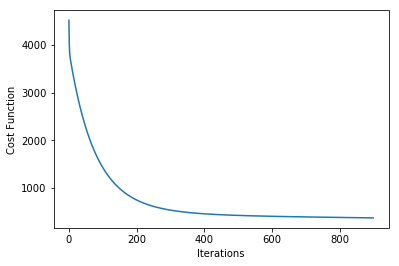

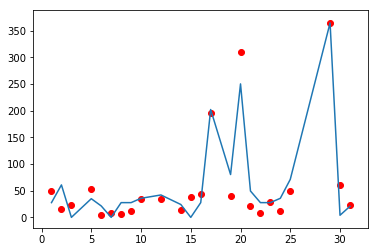

In [10]:
m1x=data[0:24,2]
m1y=data[0:24,0]
m1d=data[0:24,3]
f=57
iterations = 900
alpha = 0.008
theta1,J_history,yhat1=main(m1x,m1y)
print (theta1)
print(J_history)
m1 = m1x.size
m1x.shape = (m1, 1)
plot(arange(iterations), J_history)
xlabel('Iterations')
ylabel('Cost Function')
show()
plot(m1d,yhat1)
scatter(m1d, m1y, marker='o', c='r')
show()

[[ 58.27770174]
 [ 48.46406251]
 [ 26.13003342]
 [ 12.049318  ]
 [  5.28033404]
 [  2.08884514]
 [  0.55142419]
 [ -0.20549306]
 [ -0.58446395]
 [ -0.77660474]
 [ -0.87496131]
 [ -0.92569391]
 [ -0.95202463]
 [ -0.96576122]
 [ -0.97295869]
 [ -0.97674375]
 [ -0.97874043]
 [ -0.97979645]
 [ -0.98035619]
 [ -0.98065342]
 [ -0.98081149]
 [ -0.98089566]
 [ -0.98094052]
 [ -0.98096446]
 [ -0.98097723]
 [ -0.98098406]
 [ -0.9809877 ]
 [ -0.98098965]
 [ -0.9809907 ]
 [ -0.98099125]
 [ -0.98099155]
 [ -0.98099171]
 [ -0.9809918 ]
 [ -0.98099184]
 [ -0.98099187]
 [ -0.98099188]
 [ -0.98099189]
 [ -0.98099189]
 [ -0.98099189]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]]
[[ 2862.06785678]
 [ 2710.88871991]
 [ 2641.56008472]
 [ 2597.20107176]

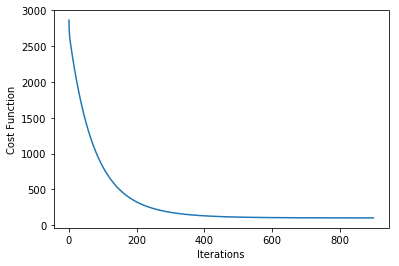

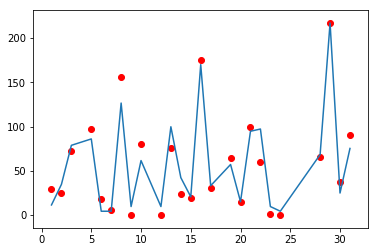

In [11]:
m2x=data[24:49,2]
m2y=data[24:49,0]
m2d=data[24:49,3]
f=57
iterations = 900
alpha = 0.008
theta2,J_history,yhat2=main(m2x,m2y)
print (theta2)
print(J_history)
m2 = m2x.size
m2x.shape = (m2, 1)
plot(arange(iterations), J_history)
xlabel('Iterations')
ylabel('Cost Function')
show()
plot(m2d,yhat2)
scatter(m2d, m2y, marker='o', c='r')
show()

C:\ProgramData\Anaconda2\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


[[  2.54597281e+02]
 [  7.73129104e+01]
 [  3.47513224e+01]
 [  1.33760113e+01]
 [  2.80838373e+00]
 [ -2.23737465e+00]
 [ -4.46619733e+00]
 [ -5.27037825e+00]
 [ -5.36016378e+00]
 [ -5.09606997e+00]
 [ -4.66213082e+00]
 [ -4.15399001e+00]
 [ -3.62277896e+00]
 [ -3.09671974e+00]
 [ -2.59176017e+00]
 [ -2.11689056e+00]
 [ -1.67689937e+00]
 [ -1.27388994e+00]
 [ -9.08183795e-01]
 [ -5.78904956e-01]
 [ -2.84384333e-01]
 [ -2.24519591e-02]
 [  2.09347858e-01]
 [  4.13598237e-01]
 [  5.92895023e-01]
 [  7.49766023e-01]
 [  8.86616580e-01]
 [  1.00569537e+00]
 [  1.10907547e+00]
 [  1.19864662e+00]
 [  1.27611558e+00]
 [  1.34301200e+00]
 [  1.40069797e+00]
 [  1.45037972e+00]
 [  1.49312045e+00]
 [  1.52985353e+00]
 [  1.56139550e+00]
 [  1.58845854e+00]
 [  1.61166219e+00]
 [  1.63154416e+00]
 [  1.64857018e+00]
 [  1.66314295e+00]
 [  1.67561015e+00]
 [  1.68627147e+00]
 [  1.69538500e+00]
 [  1.70317271e+00]
 [  1.70982538e+00]
 [  1.71550676e+00]
 [  1.72035737e+00]
 [  1.72449767e+00]


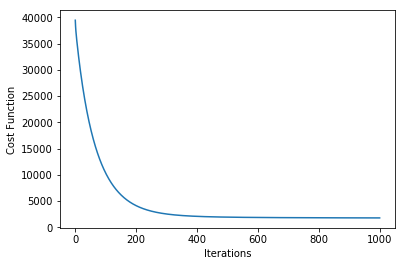

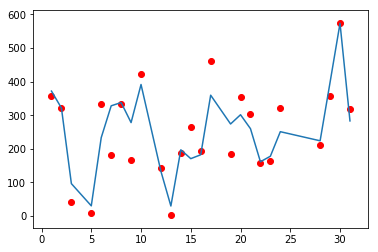

In [12]:
m3x=data[49:74,2]
m3y=data[49:74,0]
m3d=data[49:74,3]
f=57
iterations = 1000
alpha = 0.007
theta3,J_history,yhat3=main(m3x,m3y)
print (theta3)
print(J_history)
m3 = m3x.size
m3x.shape = (m3, 1)
plot(arange(iterations), J_history)
xlabel('Iterations')
ylabel('Cost Function')
show()
plot(m3d,yhat3)
scatter(m3d, m3y, marker='o', c='r')
show()

[[  1.04848900e+02]
 [  4.04240269e+01]
 [  2.59362741e+01]
 [  1.38689424e+01]
 [  5.43504845e+00]
 [  1.46267845e-01]
 [ -2.85757723e+00]
 [ -4.35807078e+00]
 [ -4.93322999e+00]
 [ -4.96869735e+00]
 [ -4.70713958e+00]
 [ -4.29573997e+00]
 [ -3.82134932e+00]
 [ -3.33384650e+00]
 [ -2.86086008e+00]
 [ -2.41679150e+00]
 [ -2.00826599e+00]
 [ -1.63740174e+00]
 [ -1.30376368e+00]
 [ -1.00552870e+00]
 [ -7.40178389e-01]
 [ -5.04908291e-01]
 [ -2.96866580e-01]
 [ -1.13289650e-01]
 [  4.84246187e-02]
 [  1.90681283e-01]
 [  3.15675437e-01]
 [  4.25392743e-01]
 [  5.21617707e-01]
 [  6.05946159e-01]
 [  6.79799762e-01]
 [  7.44441193e-01]
 [  8.00989188e-01]
 [  8.50432954e-01]
 [  8.93645699e-01]
 [  9.31397135e-01]
 [  9.64364910e-01]
 [  9.93144985e-01]
 [  1.01826098e+00]
 [  1.04017260e+00]
 [  1.05928308e+00]
 [  1.07594594e+00]
 [  1.09047089e+00]
 [  1.10312912e+00]
 [  1.11415798e+00]
 [  1.12376506e+00]
 [  1.13213189e+00]
 [  1.13941712e+00]
 [  1.14575936e+00]
 [  1.15127966e+00]


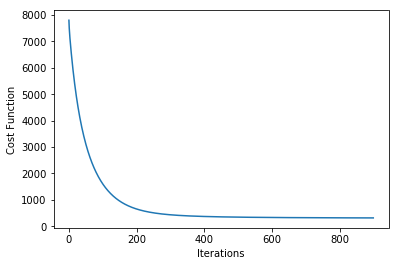

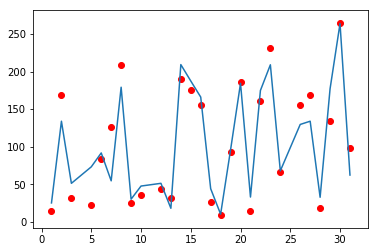

In [13]:
m4x=data[74:102,2]
m4y=data[74:102,0]
m4d=data[74:102,3]
f=57
iterations = 900
alpha = 0.008
theta4,J_history,yhat4=main(m4x,m4y)
print (theta4)
print(J_history)
m4 = m4x.size
m4x.shape = (m4, 1)
plot(arange(iterations), J_history)
xlabel('Iterations')
ylabel('Cost Function')
show()
plot(m4d,yhat4)
scatter(m4d, m4y, marker='o', c='r')
show()

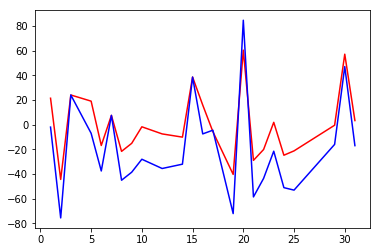

In [14]:
plot(m1d,m1y-yhat1,c='r')
plot(m1d,m1y-m1x,c='b')

show()

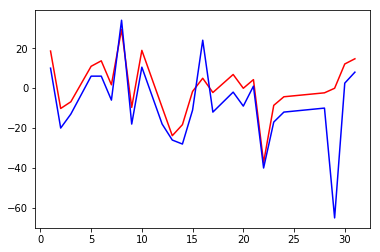

In [15]:
plot(m2d,m2y-yhat2,c='r')
plot(m2d,m2y-m2x,c='b')
show()

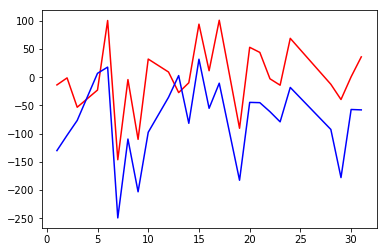

In [16]:
plot(m3d,m3y-yhat3,c='r')
plot(m3d,m3y-m3x,c='b')
show()

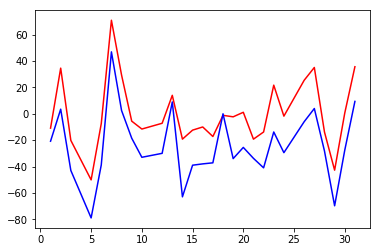

In [17]:
plot(m4d,m4y-yhat4,c='r')
plot(m4d,m4y-m4x,c='b')
show()

In [18]:
calculate(m1x,m1y,yhat1)

(array([ 0.00681994]), array([ 0.30327869]))

In [19]:
calculate(m2x,m2y,yhat2)

(array([ 0.0011432]), array([ 0.22162162]))

In [20]:
calculate(m3x,m3y,yhat3)

(array([ 0.00039505]), array([ 0.13287332]))

In [21]:
calculate(m4x,m4y,yhat4)

(array([ 0.00028782]), array([ 0.09105522]))

In [22]:
calculate(m3x,m3y,yhat2)#如果以第三套工厂的预测和第二套工厂的实际计算数值，明显就增大了

(array([ 0.34247482]), array([ 0.13287332]))

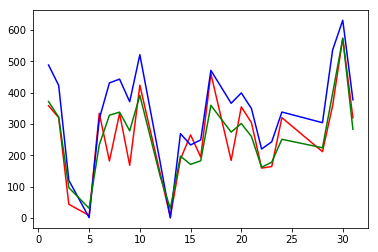

In [23]:
plot(m3d,m3y,c='r')
plot(m3d,m3x,c='b')
plot(m3d,yhat3,c='g')
show()#红色是实际量，蓝色是前一天预订量，绿色是系统预测量

In [24]:
predict(143,3)#预测函数，predict(预定量，选择模型1，2，3，4)，其中1:田湾厂-J3613,2:田湾厂-J3623，3:青衣厂-3568,4:青衣厂-3518

array([ 121.91673086])